<a href="https://colab.research.google.com/github/faisaladisoe/image-processing-lab/blob/master/Lab%202/source%20code/Lab2_1906293184_MuhammadFaisalAdiSoesatyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Library

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, util, exposure, filters, morphology
from scipy import fftpack as fp

# Import Helper

In [87]:
from helper import *

# Task 1

## Importing image

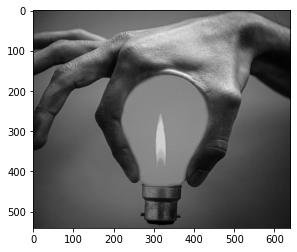

In [65]:
lamp_image = color.rgb2gray(io.imread('./images/lamp.jpg'))
plt.imshow(lamp_image, cmap = 'gray')
plt.show()

## Show image in frequency domain

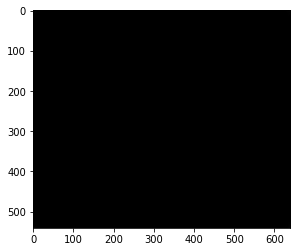

In [79]:
fft = fp.fft2(lamp_image)
plt.imshow(abs(fft), cmap = 'gray');
plt.show()

### Calculate magnitude

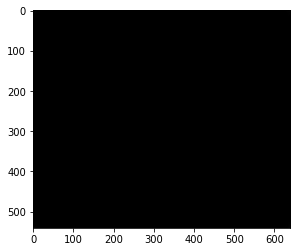

In [81]:
ft_norm = abs(fft)
plt.imshow(ft_norm, cmap = 'gray');
plt.show()

### Scale image

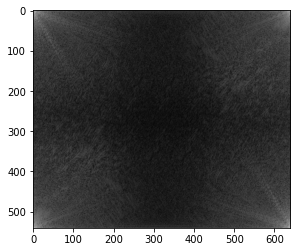

In [84]:
ft_scale = np.log(1 + ft_norm)
plt.imshow(ft_scale, cmap = 'gray');
plt.show()

### Shift image

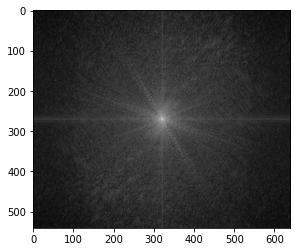

In [85]:
ft_shift = fp.fftshift(ft_scale)
plt.imshow(ft_shift, cmap = 'gray');
plt.show()

### Reverse fft image

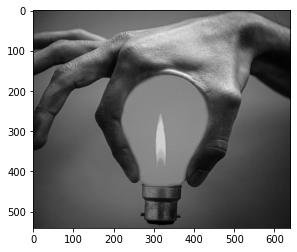

In [86]:
ift = fp.ifft2(fft).real
plt.imshow(abs(ift), cmap='gray');
plt.show()

## Show image in spatial & frequency domain from low pass filter 

### Computation

In [102]:
# Count width & length
w, l = paddedsize(lamp_image.shape[0], lamp_image.shape[1])

# create ideal & butterworth lowpass filter
ideal = lpfilter('ideal', w, l, .05 * w)
butterworth = lpfilter('btw', w, l, .05 * w)

# count fft image
fft_ideal = fp.fft2(lamp_image, (w, l))

# apply low-pass ideal & butterworth filter
LPFS_ideal_image = ideal * fft_ideal
LPFS_btw_image = butterworth * fft_ideal

# calculate IDFT for spatial domain
LPF_ideal_image = fp.ifft2(LPFS_ideal_image).real
LPF_btw_image = fp.ifft2(LPFS_btw_image).real

LPF_ideal_image = LPF_ideal_image[:lamp_image.shape[0], :lamp_image.shape[1]]
LPF_btw_image = LPF_btw_image[:lamp_image.shape[0], :lamp_image.shape[1]]

# shifting
fourier_spectrum = fp.fftshift(fft_ideal)
fourier_spectrum_display_ideal = fp.fftshift(LPFS_ideal_image)
fourier_spectrum_display_btw = fp.fftshift(LPFS_btw_image)

# scaling
scaling_1 = np.log(1 + abs(fourier_spectrum))
scaling_2_ideal = np.log(1 + abs(fourier_spectrum_display_ideal))
scaling_2_btw = np.log(1 + abs(fourier_spectrum_display_btw))

### Show result

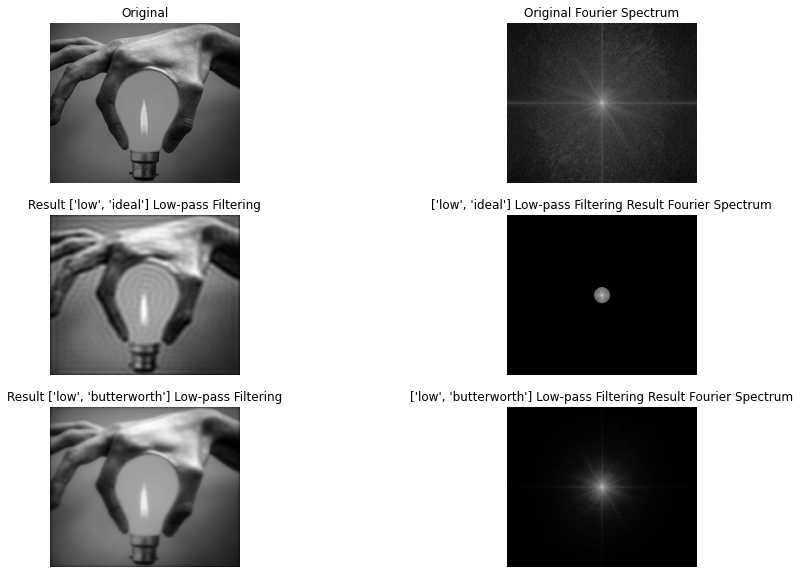

In [107]:
plt.figure(figsize=(15, 10))

# Show image
plt.subplot(3,2,1); plt.imshow(lamp_image, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(3,2,2); plt.imshow(scaling_1, cmap='gray')
plt.title("Original Fourier Spectrum")
plt.axis("off")

plt.subplot(3,2,3); plt.imshow(LPF_ideal_image, cmap='gray')
plt.title("Result ['low', 'ideal'] Low-pass Filtering")
plt.axis("off")

plt.subplot(3,2,4); plt.imshow(scaling_2_ideal, cmap='gray')
plt.title("['low', 'ideal'] Low-pass Filtering Result Fourier Spectrum")
plt.axis("off")

plt.subplot(3,2,5); plt.imshow(LPF_btw_image, cmap='gray')
plt.title("Result ['low', 'butterworth'] Low-pass Filtering")
plt.axis("off")

plt.subplot(3,2,6); plt.imshow(scaling_2_btw, cmap='gray')
plt.title("['low', 'butterworth'] Low-pass Filtering Result Fourier Spectrum")
plt.axis("off")

plt.show()

### Difference between butterworth & ideal in low pass filter

TODO

## Show image in spatial & frequence domain from high pass filter

### Computation

In [108]:
# Count width & length
w, l = paddedsize(lamp_image.shape[0], lamp_image.shape[1])

# create ideal & butterworth lowpass filter
ideal = hpfilter('ideal', w, l, .05 * w)
butterworth = hpfilter('btw', w, l, .05 * w)

# count fft image
fft_ideal = fp.fft2(lamp_image, (w, l))

# apply low-pass ideal & butterworth filter
LPFS_ideal_image = ideal * fft_ideal
LPFS_btw_image = butterworth * fft_ideal

# calculate IDFT for spatial domain
LPF_ideal_image = fp.ifft2(LPFS_ideal_image).real
LPF_btw_image = fp.ifft2(LPFS_btw_image).real

LPF_ideal_image = LPF_ideal_image[:lamp_image.shape[0], :lamp_image.shape[1]]
LPF_btw_image = LPF_btw_image[:lamp_image.shape[0], :lamp_image.shape[1]]

# shifting
fourier_spectrum = fp.fftshift(fft_ideal)
fourier_spectrum_display_ideal = fp.fftshift(LPFS_ideal_image)
fourier_spectrum_display_btw = fp.fftshift(LPFS_btw_image)

# scaling
scaling_1 = np.log(1 + abs(fourier_spectrum))
scaling_2_ideal = np.log(1 + abs(fourier_spectrum_display_ideal))
scaling_2_btw = np.log(1 + abs(fourier_spectrum_display_btw))

### Show result

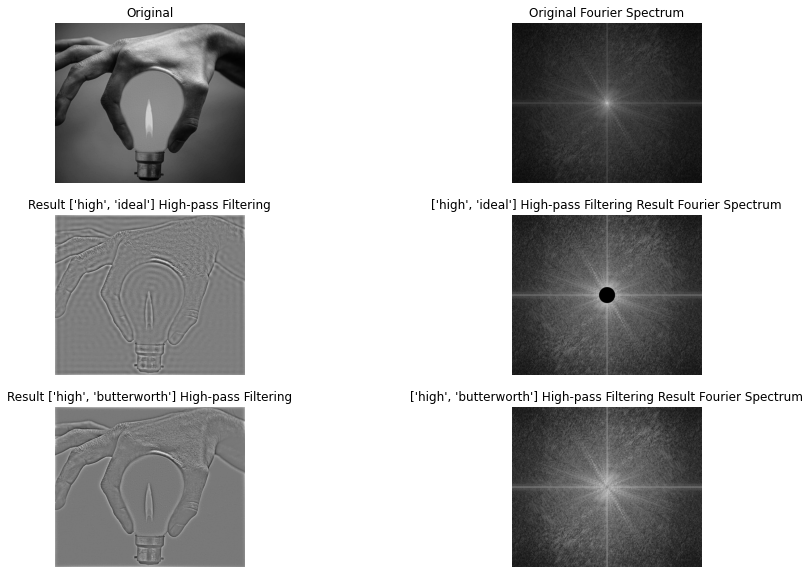

In [109]:
plt.figure(figsize=(15, 10))

# Show image
plt.subplot(3,2,1); plt.imshow(lamp_image, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(3,2,2); plt.imshow(scaling_1, cmap='gray')
plt.title("Original Fourier Spectrum")
plt.axis("off")

plt.subplot(3,2,3); plt.imshow(LPF_ideal_image, cmap='gray')
plt.title("Result ['high', 'ideal'] High-pass Filtering")
plt.axis("off")

plt.subplot(3,2,4); plt.imshow(scaling_2_ideal, cmap='gray')
plt.title("['high', 'ideal'] High-pass Filtering Result Fourier Spectrum")
plt.axis("off")

plt.subplot(3,2,5); plt.imshow(LPF_btw_image, cmap='gray')
plt.title("Result ['high', 'butterworth'] High-pass Filtering")
plt.axis("off")

plt.subplot(3,2,6); plt.imshow(scaling_2_btw, cmap='gray')
plt.title("['high', 'butterworth'] High-pass Filtering Result Fourier Spectrum")
plt.axis("off")

plt.show()

### Difference between butterworth & ideal in high pass filter

TODO

## Effect of D0 in part (b, low-pass filter) and (c, high-pass filter)

TODO

# Task 2